In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [389]:
d=pd.read_csv(r"C:\Users\ADMIN\Downloads\heart_2020_cleaned1.csv")
d.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [390]:
d.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [391]:
d.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [392]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [393]:
d.HeartDisease =le.fit_transform(d.HeartDisease)
d.Smoking=le.fit_transform(d.Smoking)
d.AlcoholDrinking=le.fit_transform(d.AlcoholDrinking)
d.Stroke=le.fit_transform(d.Stroke)
d.DiffWalking=le.fit_transform(d.DiffWalking)
d.Sex=le.fit_transform(d.Sex)
d.AgeCategory=le.fit_transform(d.AgeCategory)
d.Diabetic=le.fit_transform(d.Diabetic)
d.Race=le.fit_transform(d.Race)
d.PhysicalActivity=le.fit_transform(d.PhysicalActivity)
d.GenHealth=le.fit_transform(d.GenHealth)
d.Asthma=le.fit_transform(d.Asthma)
d.KidneyDisease=le.fit_transform(d.KidneyDisease)
d.SkinCancer=le.fit_transform(d.SkinCancer)

In [394]:
d.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime             int64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [397]:
HeartDisease=d["HeartDisease"]
d=d.drop(["HeartDisease"],axis=1)

In [400]:
d["HeartDisease"]=HeartDisease
d.head(1)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.6,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1,0


# Model Building

In [11]:
x=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [401]:
x.head(1)
#y.head(1)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.6,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [16]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((30856, 17), (7715, 17), (30856,), (7715,))

# Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [18]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [19]:
lg_p=lg.predict(x_te)
lg_p

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[0.9144291 , 0.0855709 ],
       [0.94885134, 0.05114866],
       [0.93518254, 0.06481746],
       ...,
       [0.97379233, 0.02620767],
       [0.97986507, 0.02013493],
       [0.99686596, 0.00313404]])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[7029,  544],
       [  79,   63]], dtype=int64)

In [23]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

91.9248217757615

In [24]:
from sklearn.metrics import classification_report

In [25]:
fpr_1 = 544/(544+63)
fpr_1

0.8962108731466227

In [26]:
tpr_1=7029/(7029+79)
tpr_1

0.9888857625211029

In [27]:
recall_1=7029/(7029+79)
recall_1

0.9888857625211029

In [28]:
precision_1 = 7029/(7029+544)
precision_1

0.9281658523702627

In [29]:
f1_score_1=(2*(precision_1*recall_1))/(precision_1+recall_1)
f1_score_1

0.9575641986240718

In [30]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7573
           1       0.10      0.44      0.17       142

    accuracy                           0.92      7715
   macro avg       0.55      0.69      0.56      7715
weighted avg       0.97      0.92      0.94      7715



In [31]:
#AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [32]:
roc=roc_auc_score(lg_p,y_te)
roc

0.6859139121006244

In [402]:
df=pd.DataFrame(pred_prob)
#df

In [34]:
fpr,tpr,thrshold=roc_curve(y_te,df.iloc[:,1])
fpr

array([0.00000000e+00, 0.00000000e+00, 1.40686550e-04, ...,
       9.90996061e-01, 9.90996061e-01, 1.00000000e+00])

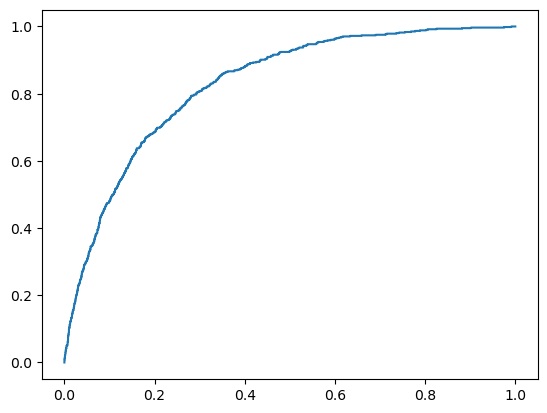

In [35]:
plt.plot(fpr,tpr)

In [36]:
#PRC 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [37]:
precision,recall,thredshold=precision_recall_curve(y_te,df.iloc[:,1])

Text(0.5, 1.0, 'Precision-Recall')

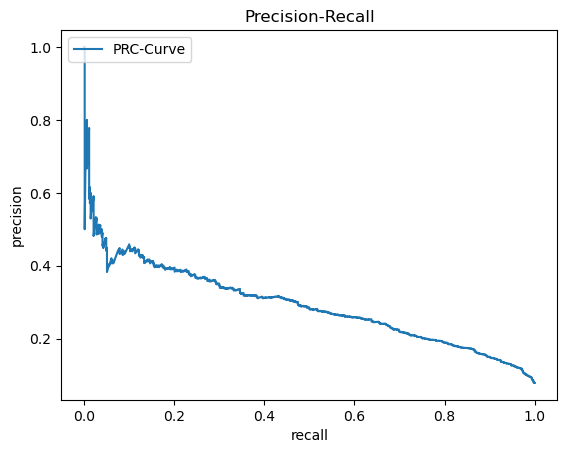

In [38]:
plt.plot(recall,precision,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [40]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [41]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
dt_m=confusion_matrix(dt_p,y_te)

In [43]:
dt_m

array([[6531,  442],
       [ 577,  165]], dtype=int64)

In [44]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

86.79196370706416

In [45]:
fpr1=441/(441+166)
fpr1

0.7265238879736409

In [46]:
tpr1=6526/(6526+582)
tpr1

0.9181204276871131

In [47]:
recall1=6526/(6526+582)
recall1

0.9181204276871131

In [48]:
precision1=6526/(441+6526)
precision1

0.9367015932252045

In [49]:
f1_score1=(2*(precision1*recall1))/(precision1+recall1)
f1_score1

0.9273179396092363

In [50]:
dt.feature_importances_

array([0.31432712, 0.02959103, 0.00978374, 0.03526407, 0.08399899,
       0.063852  , 0.02542981, 0.02237827, 0.10495536, 0.03895023,
       0.02638754, 0.02397148, 0.05835752, 0.09551126, 0.02104497,
       0.02043802, 0.02575858])

In [51]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6973
           1       0.27      0.22      0.24       742

    accuracy                           0.87      7715
   macro avg       0.60      0.58      0.59      7715
weighted avg       0.86      0.87      0.86      7715



# random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [53]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [54]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[7013,  557],
       [  95,   50]], dtype=int64)

In [56]:
fpr2=557/(557+50)
fpr2

0.9176276771004942

In [57]:
tpr2=7011/(7011+97)
tpr2

0.9863534046145188

In [58]:
recall2=7011/(7011+97)
recall2

0.9863534046145188

In [59]:
precision2=7011/(557+7011)
precision2

0.9264006342494715

In [60]:
f1_score2=(2*(precision2*recall2))/(precision2+recall2)
f1_score2

0.955437448896157

In [61]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

91.54893065456902

In [62]:
rf.feature_importances_

array([0.2744708 , 0.02505429, 0.0106247 , 0.03493759, 0.07946809,
       0.06670659, 0.02808604, 0.02690082, 0.11889831, 0.03974841,
       0.03497404, 0.0268004 , 0.06793185, 0.10329114, 0.02289071,
       0.01823126, 0.02098497])

In [63]:
print(classification_report (rf_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7570
           1       0.08      0.34      0.13       145

    accuracy                           0.92      7715
   macro avg       0.53      0.64      0.54      7715
weighted avg       0.97      0.92      0.94      7715



# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [65]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [66]:
knn_p=knn.predict(x_te)
knn_p

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[7104,  602],
       [   4,    5]], dtype=int64)

In [68]:
fpr3=602/(602+5)
fpr3

0.9917627677100495

In [69]:
tpr3=7104/(7104+4)
tpr3

0.9994372537985369

In [70]:
recall3=7104/(7104+4)
recall3

0.9994372537985369

In [71]:
precision3=7104/(7104+602)
precision3

0.9218790552815987

In [72]:
f1_score3=(2*(precision3*recall3))/(precision3+recall3)
f1_score3

0.9590927501012555

In [73]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

92.1451717433571

In [74]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7706
           1       0.01      0.56      0.02         9

    accuracy                           0.92      7715
   macro avg       0.50      0.74      0.49      7715
weighted avg       1.00      0.92      0.96      7715



In [75]:
lst=list()

In [76]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

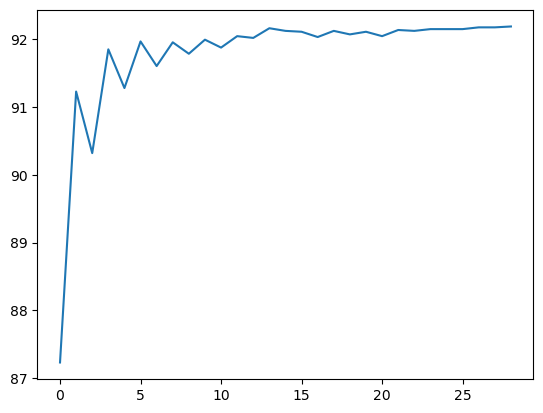

In [77]:
p=plt.plot(lst)

# Navie bayes

In [78]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [79]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [80]:
nb_p=nb.predict(x_te)

In [81]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m

array([[6297,  395],
       [ 811,  212]], dtype=int64)

In [82]:
fpr4=395/(395+212)
fpr4

0.6507413509060955

In [83]:
tpr4=6297/(6297+811)
tpr4

0.8859032076533483

In [84]:
recall4=6297/(6297+811)
recall4

0.8859032076533483

In [85]:
precision4=6297/(6297+395)
precision4

0.9409742976688583

In [86]:
f1_score4=(2*(precision4*recall4))/(precision4+recall4)
f1_score4

0.912608695652174

In [87]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

84.36811406351264

In [88]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6692
           1       0.35      0.21      0.26      1023

    accuracy                           0.84      7715
   macro avg       0.62      0.57      0.59      7715
weighted avg       0.81      0.84      0.83      7715



# SVM

In [89]:
from sklearn.svm import SVC
svc=SVC()

In [90]:
svc.fit(x_tr,y_tr)

SVC()

In [91]:
svc_p=svc.predict(x_te)

In [92]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[7108,  607],
       [   0,    0]], dtype=int64)

In [93]:
fpr5=607/(607+0)
fpr5

1.0

In [94]:
tpr5=7108/(7108+0)
tpr5

1.0

In [95]:
recall5=7108/(7108+0)
recall5

1.0

In [96]:
precision5=7108/(7108+607)
precision5

0.9213220998055736

In [97]:
f1_score5=(2*(precision5*recall5))/(precision5+recall5)
f1_score5

0.9590501248060447

In [98]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

92.13220998055735

In [99]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7715
           1       0.00      0.00      0.00         0

    accuracy                           0.92      7715
   macro avg       0.50      0.46      0.48      7715
weighted avg       1.00      0.92      0.96      7715



# Ada Boost

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [101]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [102]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [103]:
adbo_p=adbo.predict(x_te)

In [104]:
adbo_m=confusion_matrix(adbo_p,y_te)
adbo_m

array([[6557,  450],
       [ 551,  157]], dtype=int64)

In [105]:
fpr6=443/(443+164)
fpr6

0.729818780889621

In [106]:
tpr6=6548/(6548+560)
tpr6

0.9212155317951604

In [107]:
recall6=6548/(6548+560)
recall6

0.9212155317951604

In [108]:
precision6=6548/(6548+443)
precision6

0.9366328136175083

In [109]:
f1_score6=(2*(precision6*recall6))/(precision6+recall6)
f1_score6

0.928860202851266

In [110]:
adbo_acc=adbo_m.diagonal().sum()/adbo_m.sum()*100
adbo_acc

87.0252754374595

In [111]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7007
           1       0.26      0.22      0.24       708

    accuracy                           0.87      7715
   macro avg       0.59      0.58      0.58      7715
weighted avg       0.86      0.87      0.87      7715



# xg Boost

In [112]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [113]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
xgb_p=xgb.predict(x_te)

In [115]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[7004,  528],
       [ 104,   79]], dtype=int64)

In [116]:
fpr7=528/(528+79)
fpr7

0.8698517298187809

In [117]:
tpr7=7004/(7004+104)
tpr7

0.9853685987619584

In [118]:
recall7=7004/(7004+104)
recall7

0.9853685987619584

In [119]:
precision7=7004/(7004+528)
precision7

0.9298990971853426

In [120]:
f1_score7=(2*(precision7*recall7))/(precision7+recall7)
f1_score7

0.9568306010928962

In [121]:
xgb_ac=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac

91.80816591056383

In [122]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7532
           1       0.13      0.43      0.20       183

    accuracy                           0.92      7715
   macro avg       0.56      0.68      0.58      7715
weighted avg       0.97      0.92      0.94      7715



In [123]:
l1=["LG","DT","RF","SVM","KNN","NB","AdaBoost","xgBoost"]
l2=[lg_acc,dt_acc,rf_acc,svc_acc,knn_acc,nb_acc,adbo_acc,xgb_ac]
l3=[tpr_1,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7]
l4=[fpr_1,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
l5=[f1_score_1,f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7]

In [124]:
finalPred=pd.DataFrame({"Model Name":l1,"accuracy":l2,"TPR":l3,"FPR":l4,"f1_score":l5})
finalPred

,Model Name,accuracy,TPR,FPR,f1_score
0,LG,91.924822,0.988886,0.896211,0.957564
1,DT,86.791964,0.918120,0.726524,0.927318
2,RF,91.548931,0.986353,0.917628,0.955437
3,SVM,92.132210,0.999437,0.991763,0.959093
4,KNN,92.145172,0.885903,0.650741,0.912609
5,NB,84.368114,1.000000,1.000000,0.959050
6,AdaBoost,87.025275,0.921216,0.729819,0.928860
7,xgBoost,91.808166,0.985369,0.869852,0.956831


In [411]:
#AUC
fpr3,tpr3,thrshold3=roc_curve(y_te,xgb_p)

<function matplotlib.pyplot.show(close=None, block=None)>

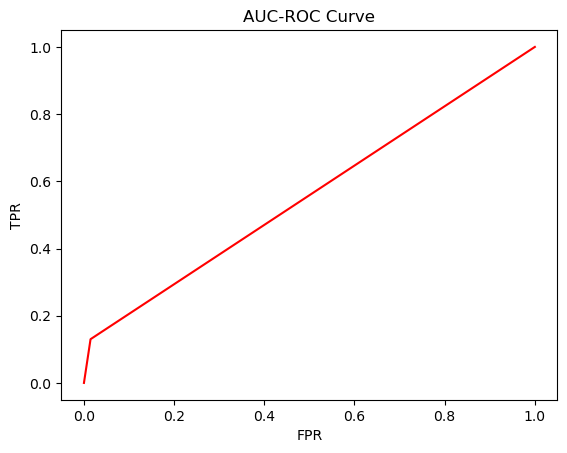

In [418]:
fig,ax=plt.subplots()
ax.plot(fpr3,tpr3,color="red")
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show

# class imbalance

# random oversampling

In [129]:
c_0,c_1=d["HeartDisease"].value_counts()
c_0,c_1

(35374, 3197)

In [130]:
train_0=d[d["HeartDisease"]==0]
train_1=d[d["HeartDisease"]==1]

In [131]:
train_0.shape,train_1.shape

((35374, 18), (3197, 18))

In [132]:
train_1over=train_1.sample(c_0,replace=True)

In [133]:
train1_0=pd.concat([train_1over,train_0],axis=0)

In [134]:
train1_0.shape

(70748, 18)

In [135]:
train1_0.HeartDisease.value_counts()

1    35374
0    35374
Name: HeartDisease, dtype: int64

In [136]:
train1_0.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
1217,23.11,1,0,0,0,0,1,1,11,2,2,0,4,8,0,0,0,1
11011,29.29,1,0,0,30,30,0,1,7,5,0,1,1,1,0,0,0,1
165,28.89,1,0,0,3,30,1,0,11,5,2,0,1,8,1,0,1,1
2620,37.25,0,0,0,10,0,0,0,7,2,2,1,2,8,1,0,0,1
4840,31.62,0,0,0,0,5,0,0,9,5,1,0,2,7,0,0,0,1


In [137]:
train1_0.HeartDisease.value_counts()

1    35374
0    35374
Name: HeartDisease, dtype: int64

# Outliers

<Axes: >

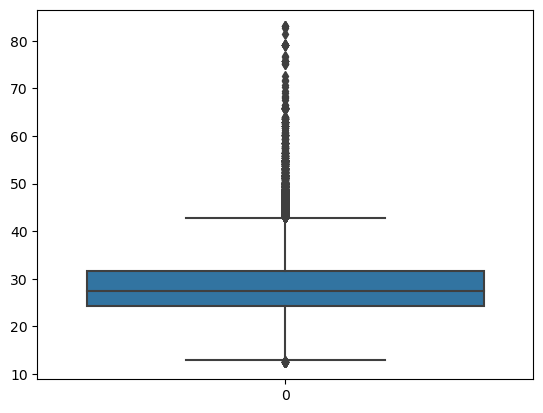

In [138]:
sns.boxplot(train1_0["BMI"])

<Axes: xlabel='BMI', ylabel='Density'>

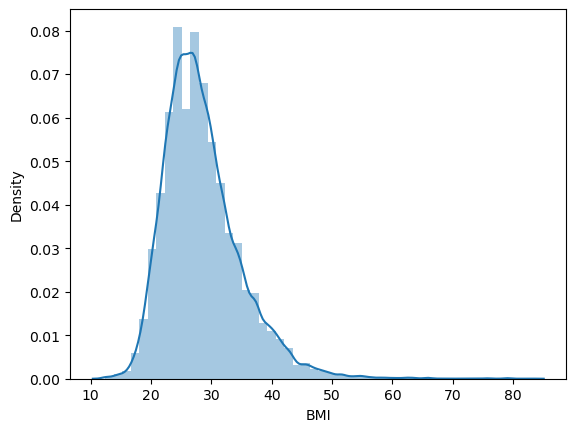

In [139]:
sns.distplot(train1_0["BMI"])

In [140]:
IQR=train1_0.BMI.quantile(0.75)-train1_0.BMI.quantile(0.25)
IQR

7.469999999999999

In [141]:
lb=train1_0["BMI"].quantile(0.75)-IQR*3
ub=train1_0["BMI"].quantile(0.25)+IQR*3
lb,ub

(9.250000000000004, 46.599999999999994)

In [142]:
train1_0.loc[train1_0["BMI"]>46.94,"BMI"]=46.94
train1_0.loc[train1_0["BMI"]<8.940000000000005,"BMI"]=8.940000000000005


<Axes: >

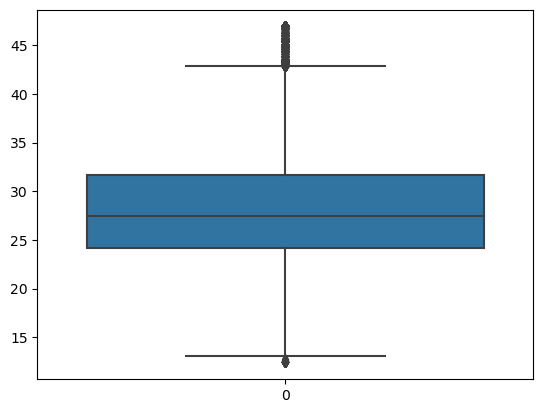

In [143]:
sns.boxplot(train1_0["BMI"])

<Axes: xlabel='BMI', ylabel='Density'>

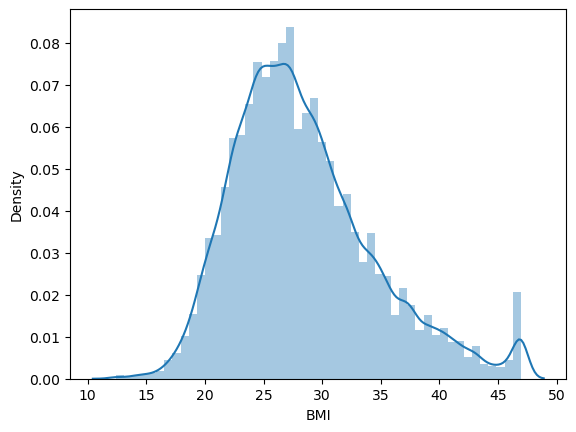

In [144]:
sns.distplot(train1_0["BMI"])

<Axes: >

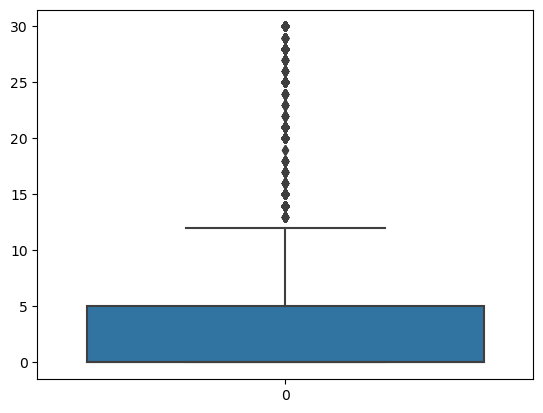

In [145]:
sns.boxplot(train1_0["PhysicalHealth"])

<Axes: xlabel='PhysicalHealth', ylabel='Density'>

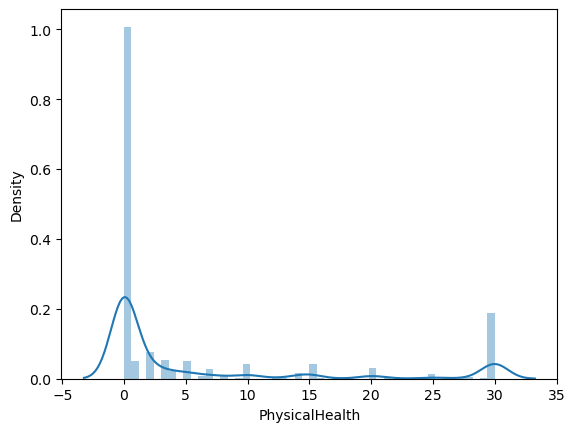

In [146]:
sns.distplot(train1_0["PhysicalHealth"])

In [147]:
IQR1=train1_0.PhysicalHealth.quantile(0.75)-train1_0.PhysicalHealth.quantile(0.25)
IQR1

5.0

In [148]:
ub1=train1_0["PhysicalHealth"].quantile(0.25)+IQR1*3
ub1

15.0

In [149]:
train1_0.loc[train1_0["PhysicalHealth"]>15.0,"PhysicalHealth"]=15.0


<Axes: >

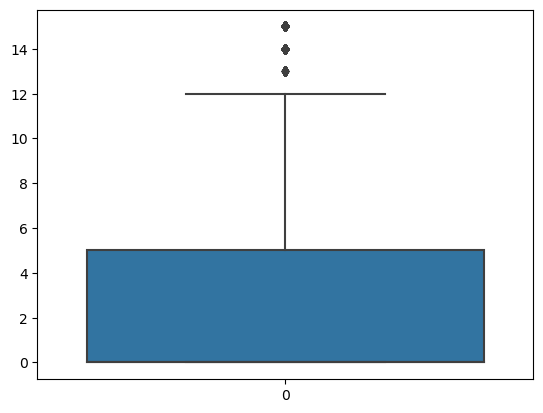

In [150]:
sns.boxplot(train1_0["PhysicalHealth"])

<Axes: xlabel='PhysicalHealth', ylabel='Density'>

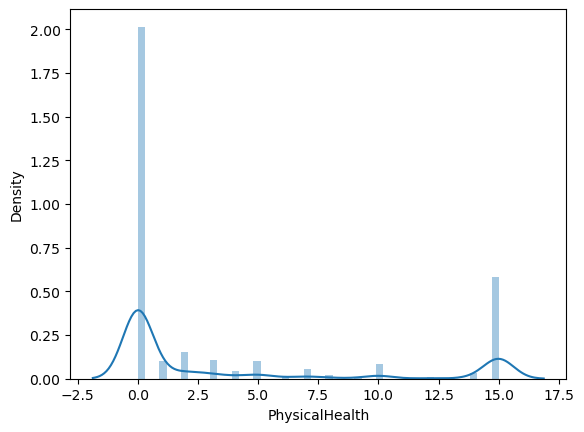

In [151]:
sns.distplot(train1_0["PhysicalHealth"])

<Axes: >

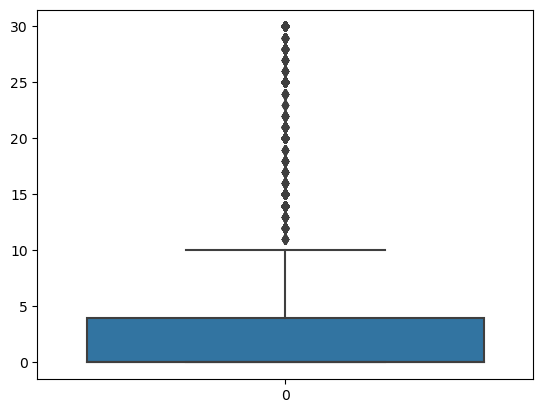

In [152]:
sns.boxplot(train1_0["MentalHealth"])

<Axes: xlabel='MentalHealth', ylabel='Density'>

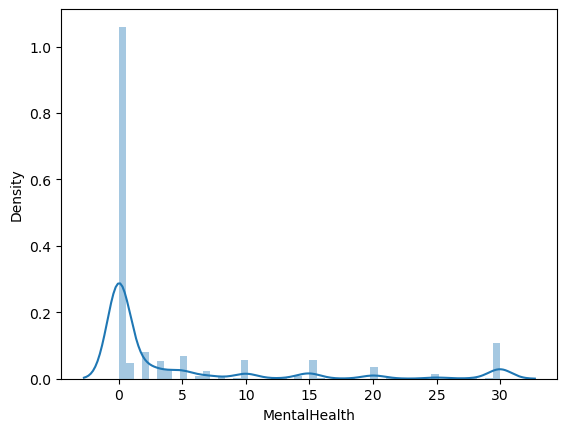

In [153]:
sns.distplot(train1_0["MentalHealth"])

In [154]:
IQR2=train1_0.MentalHealth.quantile(0.75)-train1_0.MentalHealth.quantile(0.25)
IQR2

4.0

In [155]:
ub2=train1_0["MentalHealth"].quantile(0.25)+IQR2*3
ub2

12.0

In [156]:
train1_0.loc[train1_0["MentalHealth"]>12.0,"MentalHealth"]=12.0

<Axes: >

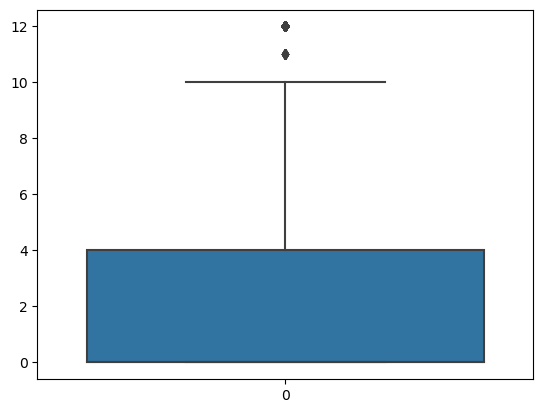

In [157]:
sns.boxplot(train1_0["MentalHealth"])

<Axes: xlabel='MentalHealth', ylabel='Density'>

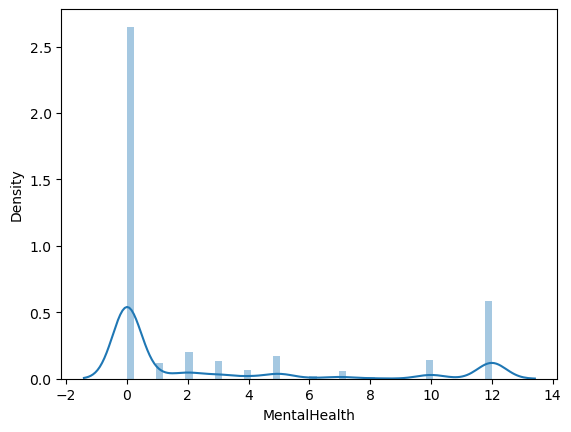

In [158]:
sns.distplot(train1_0["MentalHealth"])

<Axes: >

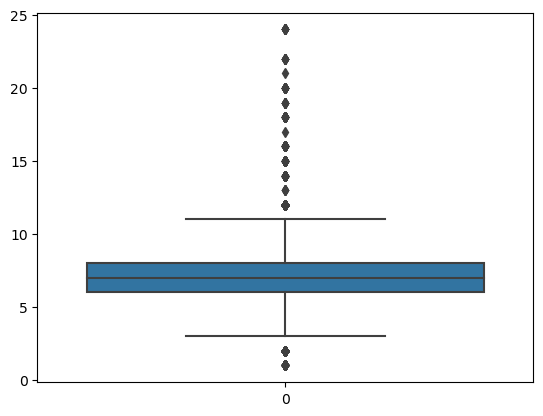

In [159]:
sns.boxplot(train1_0["SleepTime"])

<Axes: xlabel='SleepTime', ylabel='Density'>

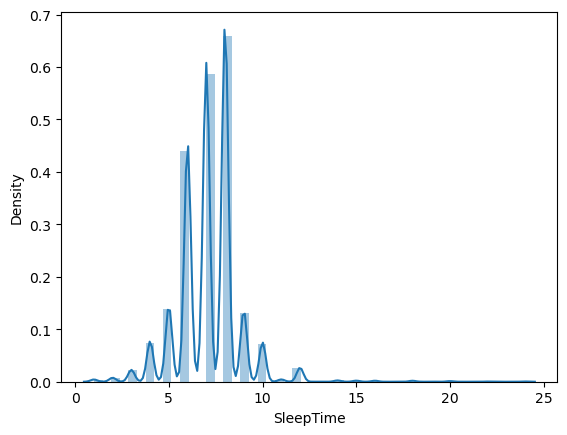

In [160]:
sns.distplot(train1_0["SleepTime"])

In [161]:
IQR3=train1_0.SleepTime.quantile(0.75)-train1_0.SleepTime.quantile(0.25)
IQR3

2.0

In [162]:
ub3=train1_0["SleepTime"].quantile(0.25)+IQR3*3
lb3=train1_0["SleepTime"].quantile(0.75)-IQR3*3
ub3,lb3

(12.0, 2.0)

In [163]:
train1_0.loc[train1_0["SleepTime"]>12.0,"MentalHealth"]=12.0
train1_0.loc[train1_0["SleepTime"]<2.0,"SleepTime"]=2.0

<Axes: >

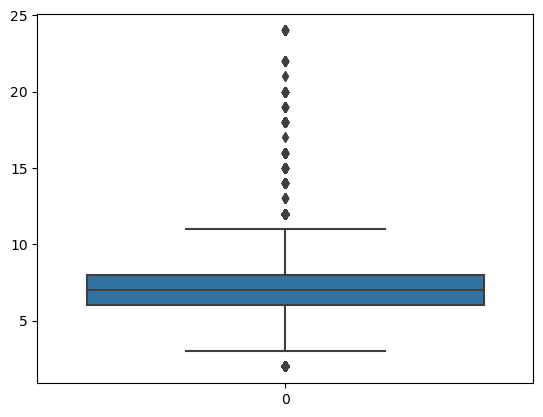

In [164]:
sns.boxplot(train1_0["SleepTime"])

<Axes: xlabel='SleepTime', ylabel='Density'>

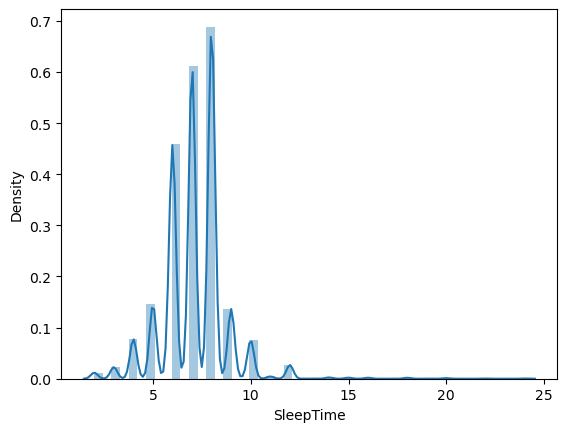

In [165]:
sns.distplot(train1_0["SleepTime"])

In [166]:
train1_0.skew()

BMI                 0.786616
Smoking            -0.005597
AlcoholDrinking     3.795555
Stroke              2.727667
PhysicalHealth      1.232435
MentalHealth        1.357092
DiffWalking         1.203278
Sex                -0.094640
AgeCategory        -0.695080
Race               -1.937214
Diabetic            1.283493
PhysicalActivity   -0.983687
GenHealth          -0.014921
SleepTime           1.086656
Asthma              1.859155
KidneyDisease       3.247886
SkinCancer          1.961241
HeartDisease        0.000000
dtype: float64

# Visualization

<Axes: >

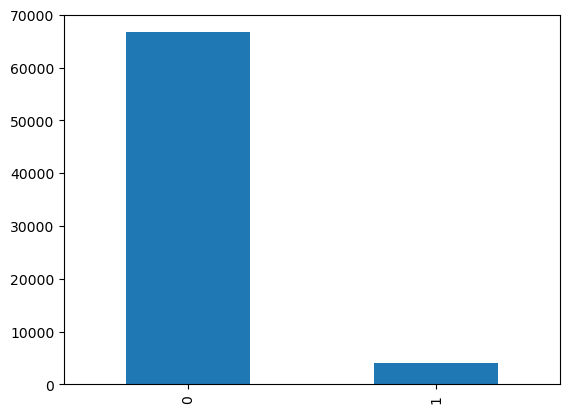

In [167]:
train1_0["AlcoholDrinking"].value_counts().plot.bar()

<Axes: >

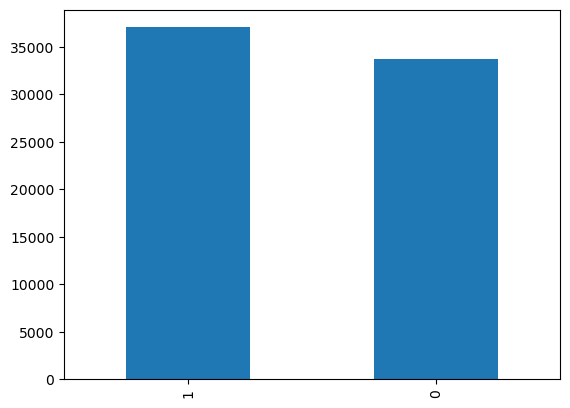

In [169]:
train1_0["Sex"].value_counts().plot.bar()

<Axes: >

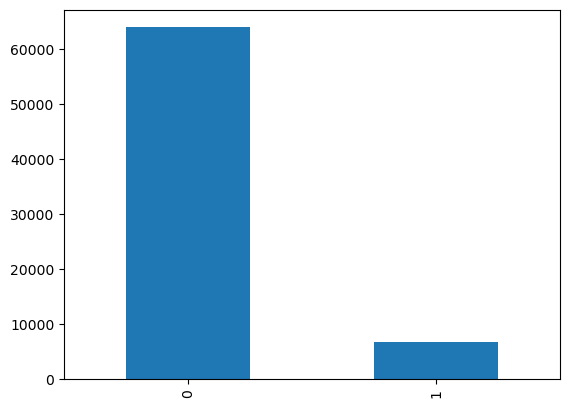

In [171]:
train1_0["Stroke"].value_counts().plot.bar()

<Axes: >

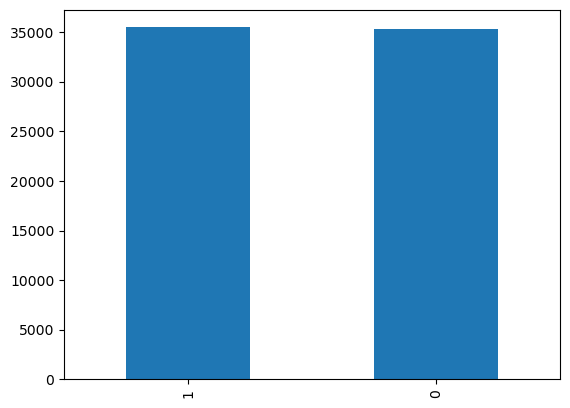

In [173]:
train1_0["Smoking"].value_counts().plot.bar()

<Axes: xlabel='Diabetic', ylabel='count'>

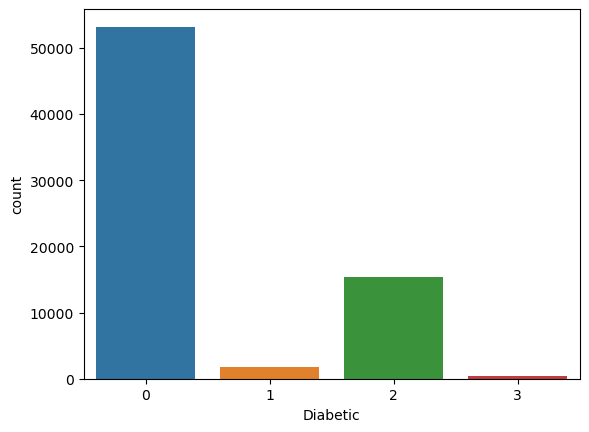

In [178]:
sns.countplot(x="Diabetic", data=train1_0)

<Axes: xlabel='Asthma', ylabel='count'>

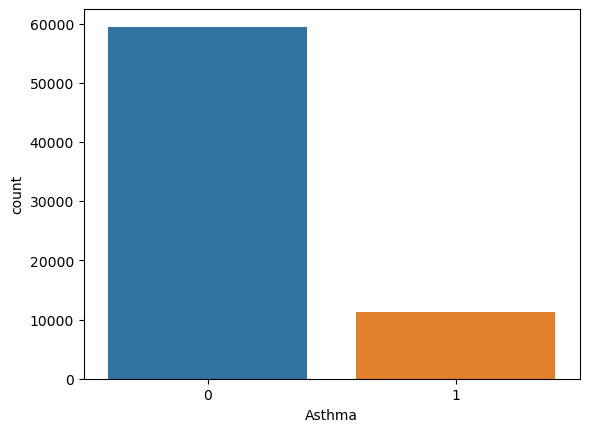

In [180]:
sns.countplot(x="Asthma", data=train1_0)

<Axes: xlabel='KidneyDisease', ylabel='count'>

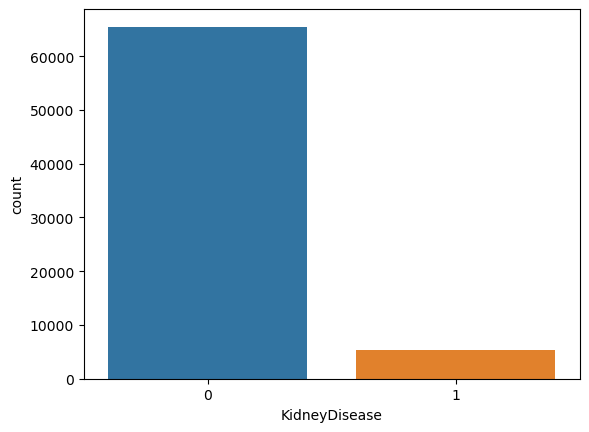

In [182]:
sns.countplot(x="KidneyDisease", data=train1_0)

# Model Building

In [186]:
x1=train1_0.iloc[:,:-1]
y1=train1_0.iloc[:,-1]

In [187]:
y1.shape,x1.shape

((70748,), (70748, 17))

In [188]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [189]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((56598, 17), (14150, 17), (56598,), (14150,))

# Logistic regression

In [190]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [191]:
lg_p1=lg.predict(x1_te)

In [192]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[5260, 1564],
       [1820, 5506]], dtype=int64)

In [193]:
fpr11=1657/(1657+5413)
fpr11

0.23437057991513438

In [194]:
tpr11=5241/(5241+1839)
tpr11

0.7402542372881356

In [195]:
recall11=5241/(5241+1839)
recall11

0.7402542372881356

In [196]:
precision11=5241/(1657+5241)
precision11

0.7597854450565381

In [197]:
f1_score11=(2*(precision11*recall11))/(precision11+recall11)
f1_score11

0.7498926885105164

In [198]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

76.08480565371025

In [199]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      6824
           1       0.78      0.75      0.76      7326

    accuracy                           0.76     14150
   macro avg       0.76      0.76      0.76     14150
weighted avg       0.76      0.76      0.76     14150



# Decision Tree

In [200]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [201]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 0, 0, ..., 0, 0, 1])

In [202]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[6493,    0],
       [ 587, 7070]], dtype=int64)

In [203]:
fpr12=0+7070/(0+7070)
fpr12

1.0

In [204]:
tpr12=6480/(6480+600)
tpr12

0.9152542372881356

In [205]:
recall12=6480/(6480+600)
recall12

0.9152542372881356

In [206]:
precision12=6480/(0+6480)
precision12

1.0

In [207]:
f1_score12=(2*(precision12*recall12))/(precision12+recall12)
f1_score12

0.9557522123893806

In [208]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

95.85159010600707

In [209]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6493
           1       1.00      0.92      0.96      7657

    accuracy                           0.96     14150
   macro avg       0.96      0.96      0.96     14150
weighted avg       0.96      0.96      0.96     14150



# Random Forest

In [210]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [211]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([1, 0, 0, ..., 0, 0, 1])

In [212]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[6756,    0],
       [ 324, 7070]], dtype=int64)

In [213]:
fpr13=0/(2+7070)
fpr13

0.0

In [214]:
tpr13=6762/(6772+318)
tpr13

0.953737658674189

In [215]:
recall13=6762/(6762+318)
recall13

0.9550847457627119

In [216]:
precision13=6762/(6762+0)
precision13

1.0

In [217]:
f1_score13=(2*(precision13*recall13))/(precision13+recall13)
f1_score13

0.977026441265713

In [218]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

97.71024734982332

In [219]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6756
           1       1.00      0.96      0.98      7394

    accuracy                           0.98     14150
   macro avg       0.98      0.98      0.98     14150
weighted avg       0.98      0.98      0.98     14150



# knn

In [220]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=29)

In [221]:
knn_p1=knn.predict(x1_te)
knn_p1

array([1, 0, 0, ..., 0, 0, 1])

In [222]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[5069, 1001],
       [2011, 6069]], dtype=int64)

In [223]:
fpr14=1097/(1097+5973)
fpr14

0.15516265912305516

In [224]:
tpr14=5105/(5105+1975)
tpr14

0.721045197740113

In [225]:
recall14=5105/(5105+1975)
recall14

0.721045197740113

In [226]:
precision14=5105/(5105+1975)
precision14

0.721045197740113

In [227]:
f1_score14=(2*(precision14*recall14))/(precision14+recall14)
f1_score14

0.7210451977401129

In [228]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

78.71378091872792

In [229]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      6070
           1       0.86      0.75      0.80      8080

    accuracy                           0.79     14150
   macro avg       0.79      0.79      0.79     14150
weighted avg       0.80      0.79      0.79     14150



In [230]:
lst=list()

In [231]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_tr,y1_tr)
    knp=knn.predict(x1_te)
    c=confusion_matrix(knp,y1_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

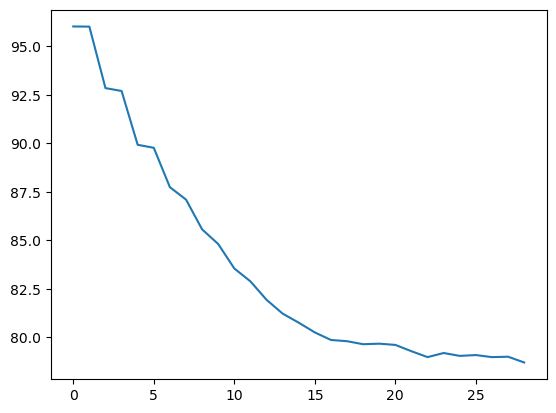

In [232]:
p=plt.plot(lst)

# Navie bayes

In [233]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [234]:
nb_p1=nb.predict(x1_te)

In [235]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[5806, 3341],
       [1274, 3729]], dtype=int64)

In [236]:
fpr15=3396/(3396+3674)
fpr15

0.48033946251768034

In [237]:
tpr15=5814/(5814+1266)
tpr15

0.8211864406779661

In [238]:
recall15=5814/(5814+1266)
recall15

0.8211864406779661

In [239]:
precision15=5814/(5814+3396)
precision15

0.6312703583061889

In [240]:
f1_score15=(2*(precision15*recall15))/(precision15+recall15)
f1_score15

0.7138121546961326

In [241]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

67.3851590106007

In [242]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.82      0.63      0.72      9147
           1       0.53      0.75      0.62      5003

    accuracy                           0.67     14150
   macro avg       0.67      0.69      0.67     14150
weighted avg       0.72      0.67      0.68     14150



# SVM

In [243]:
svc.fit(x1_tr,y1_tr)

SVC()

In [244]:
svc_p1=svc.predict(x1_te)

In [245]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[5096, 1322],
       [1984, 5748]], dtype=int64)

In [246]:
fpr16=1412/(1412+5658)
fpr16

0.19971711456859972

In [247]:
tpr16=5113/(5113+1967)
tpr16

0.7221751412429378

In [248]:
recall16=5113/(5113+1967)
recall16

0.7221751412429378

In [249]:
precision16=5113/(5113+1412)
precision16

0.7836015325670498

In [250]:
f1_score16=(2*(precision16*recall16))/(precision16+recall16)
f1_score16

0.7516354281514149

In [251]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

76.63604240282686

In [252]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76      6418
           1       0.81      0.74      0.78      7732

    accuracy                           0.77     14150
   macro avg       0.77      0.77      0.77     14150
weighted avg       0.77      0.77      0.77     14150



# Ada Boost

In [253]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [254]:
adbo_p1=adbo.predict(x1_te)

In [255]:
adbo_m1=confusion_matrix(adbo_p1,y1_te)
adbo_m1

array([[6521,    0],
       [ 559, 7070]], dtype=int64)

In [256]:
fpr17=2/(7068+2)
fpr17

0.0002828854314002829

In [257]:
tpr17=6563/(6563+517)
tpr17

0.9269774011299435

In [258]:
recall17=6563/(6563+517)
recall17

0.9269774011299435

In [259]:
precision17=6563/(6563+2)
precision17

0.9996953541507997

In [260]:
f1_score17=(2*(precision17*recall17))/(precision17+recall17)
f1_score17

0.9619640894100403

In [261]:
adbo_acc1=adbo_m1.diagonal().sum()/adbo_m1.sum()*100
adbo_acc1

96.04946996466431

In [262]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6521
           1       1.00      0.93      0.96      7629

    accuracy                           0.96     14150
   macro avg       0.96      0.96      0.96     14150
weighted avg       0.96      0.96      0.96     14150



In [263]:
roc1=roc_auc_score(adbo_p1,y1_te)
roc1

0.9633634814523528

# xgboost

In [264]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [265]:
xgb_p1=xgb.predict(x1_te)

In [266]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[5756,  523],
       [1324, 6547]], dtype=int64)

In [267]:
fpr18=582/(582+6488)
fpr18

0.08231966053748233

In [268]:
tpr18=5775/(5775+1305)
tpr18

0.815677966101695

In [269]:
recall18=5775/(5775+1305)
recall18

0.815677966101695

In [270]:
precision18=5775/(585+5775)
precision18

0.9080188679245284

In [271]:
f1_score18=(2*(precision18*recall18))/(precision18+recall18)
f1_score18

0.859375

In [272]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

86.94699646643109

In [273]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6279
           1       0.93      0.83      0.88      7871

    accuracy                           0.87     14150
   macro avg       0.87      0.87      0.87     14150
weighted avg       0.88      0.87      0.87     14150



In [274]:
l_1=["LG","DT","RF","SVM","KNN","NB","AdaBoost","xgBoost"]
l_2=[lg_acc1,dt_acc1,rf_acc1,svc_acc1,knn_acc1,nb_acc1,adbo_acc1,xgb_acc1]
l_3=[tpr11,tpr12,tpr13,tpr14,tpr15,tpr16,tpr17,tpr18]
l_4=[fpr11,fpr12,fpr13,fpr14,fpr15,fpr16,fpr17,fpr18]
l_5=[f1_score11,f1_score12,f1_score13,f1_score14,f1_score15,f1_score16,f1_score17,f1_score18]

In [275]:
finalPred1=pd.DataFrame({"Model Name":l_1,"accuracy":l_2,"TPR":l_3,"FPR":l_4,"f1_score":l_5})
finalPred1

,Model Name,accuracy,TPR,FPR,f1_score
0,LG,76.084806,0.740254,0.234371,0.749893
1,DT,95.851590,0.915254,1.000000,0.955752
2,RF,97.710247,0.953738,0.000000,0.977026
3,SVM,76.636042,0.721045,0.155163,0.721045
4,KNN,78.713781,0.821186,0.480339,0.713812
5,NB,67.385159,0.722175,0.199717,0.751635
6,AdaBoost,96.049470,0.926977,0.000283,0.961964
7,xgBoost,86.946996,0.815678,0.082320,0.859375


In [404]:
#PRC Curve
precision4,recall4,threshold=precision_recall_curve(y1_te,xgb_p1)

<function matplotlib.pyplot.show(close=None, block=None)>

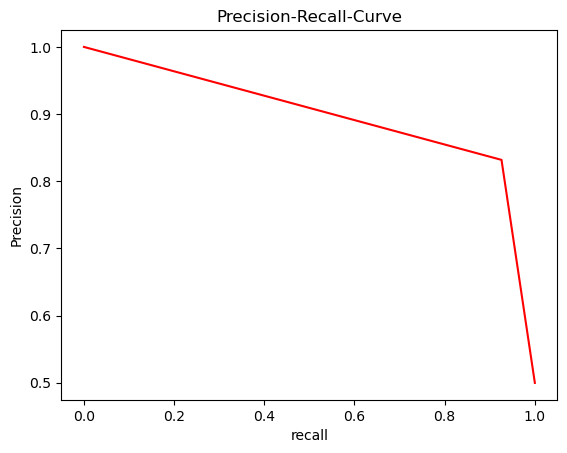

In [419]:
fig,ax=plt.subplots()
ax.plot(recall4,precision4,color="red")
plt.title("Precision-Recall-Curve")
plt.xlabel("recall")
plt.ylabel("Precision")
plt.show

# Feature Selection

# rfe

In [280]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [281]:
rfe=RFE(dTree)

In [282]:
rfe.fit(train1_0.iloc[:,2:-1],train1_0.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [283]:
rfe.support_

array([False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False, False])

In [284]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(train1_0.iloc[:,2:-1].columns)})
rfe_df

,Importances,Columns
0,False,AlcoholDrinking
1,False,Stroke
2,True,PhysicalHealth
3,True,MentalHealth
4,True,DiffWalking
5,False,Sex
6,True,AgeCategory
7,True,Race
8,False,Diabetic
9,False,PhysicalActivity


In [285]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
2,True,PhysicalHealth
3,True,MentalHealth
4,True,DiffWalking
6,True,AgeCategory
7,True,Race
10,True,GenHealth
11,True,SleepTime
0,False,AlcoholDrinking
1,False,Stroke
5,False,Sex


In [286]:
d_1=d.drop(["AlcoholDrinking","Stroke","Sex","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"],axis=1)
d_1

,BMI,Smoking,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,GenHealth,SleepTime,HeartDisease
0,16.60,1,3,30,0,7,5,4,5,0
1,20.34,0,0,0,0,12,5,4,7,0
2,26.58,1,20,30,0,9,5,1,8,0
3,24.21,0,0,0,0,11,5,2,6,0
4,23.71,0,28,0,1,4,5,4,8,0
...,...,...,...,...,...,...,...,...,...,...
38566,39.33,0,15,0,0,1,5,3,7,0
38567,18.88,0,0,7,0,5,5,4,7,0
38568,27.44,1,0,0,0,4,5,2,6,0
38569,34.87,0,3,1,0,0,5,1,5,0


In [287]:
x_2=d_1.iloc[:,:-1]
y_2=d_1.iloc[:,-1]

In [288]:
x_2.head(1)
#y_2.head(1)

,BMI,Smoking,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,GenHealth,SleepTime
0,16.6,1,3,30,0,7,5,4,5


In [290]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x_2,y_2,test_size=0.2,random_state=100)

In [291]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((30856, 9), (7715, 9), (30856,), (7715,))

# Logistic Regression

In [292]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [293]:
lg_p3=lg.predict(x2_te)
lg_p3

array([0, 0, 0, ..., 0, 0, 0])

In [294]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[7081,  591],
       [  27,   16]], dtype=int64)

In [295]:
fpr21=601/(601+6)
fpr21

0.9901153212520593

In [296]:
tpr21=7088/(7088+20)
tpr21

0.9971862689926843

In [297]:
recall21=7088/(7088+20)
recall21

0.9971862689926843

In [298]:
precision21=7088/(7088+601)
precision21

0.9218363896475484

In [299]:
f21_score21=(2*(precision21*recall21))/(recall21+precision21)
f21_score21

0.9580320335203083

In [300]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

91.98963058976021

In [301]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7672
           1       0.03      0.37      0.05        43

    accuracy                           0.92      7715
   macro avg       0.51      0.65      0.50      7715
weighted avg       0.99      0.92      0.95      7715



# Decision tree

In [302]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [303]:
dt_p3=dt.predict(x2_te)
dt_p3

array([0, 0, 1, ..., 0, 0, 0])

In [304]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[6545,  479],
       [ 563,  128]], dtype=int64)

In [305]:
fpr22=475/(475+132)
fpr22

0.7825370675453048

In [306]:
tpr22=6527/(6527+581)
tpr22

0.9182611142374789

In [307]:
recall22=6527/(6527+581)
recall22

0.9182611142374789

In [308]:
precision22=6527/(6527+475)
precision22

0.9321622393601828

In [309]:
f22_score21=(2*(precision22*recall22))/(precision22+recall22)
f22_score21

0.9251594613749115

In [310]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

86.49384316267013

In [311]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7024
           1       0.21      0.19      0.20       691

    accuracy                           0.86      7715
   macro avg       0.57      0.56      0.56      7715
weighted avg       0.86      0.86      0.86      7715



# Random Forest

In [312]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [313]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([0, 0, 0, ..., 0, 0, 0])

In [314]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[6955,  556],
       [ 153,   51]], dtype=int64)

In [315]:
fpr23=550/(550+57)
fpr23

0.9060955518945635

In [316]:
tpr23=6958/(6958+150)
tpr23

0.9788970174451322

In [317]:
recall23=6958/(6958+150)
recall23

0.9788970174451322

In [318]:
precision23=6958/(6958+550)
precision23

0.9267448055407566

In [319]:
f23_score21=(2*(recall23*precision23))/(precision23+recall23)
f23_score21

0.9521072796934866

In [320]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

90.81011017498379

In [321]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7511
           1       0.08      0.25      0.13       204

    accuracy                           0.91      7715
   macro avg       0.53      0.59      0.54      7715
weighted avg       0.95      0.91      0.93      7715



# Navie Bayes

In [322]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [323]:
nb_p3=nb.predict(x2_te)

In [324]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3

array([[6277,  405],
       [ 831,  202]], dtype=int64)

In [325]:
fpr24=405/(405+202)
fpr24

0.6672158154859967

In [326]:
tpr24=6277/(6277+831)
tpr24

0.8830894766460327

In [327]:
recall24=6277/(6277+831)
recall24

0.8830894766460327

In [328]:
precision24=6277/(6277+405)
precision24

0.9393894043699491

In [329]:
f24_score21=(2*(precision24*recall24))/(recall24+precision24)
f24_score21

0.9103698332124728

In [330]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

83.97926117952042

In [331]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6682
           1       0.33      0.20      0.25      1033

    accuracy                           0.84      7715
   macro avg       0.61      0.57      0.58      7715
weighted avg       0.81      0.84      0.82      7715



# svm

In [332]:
svc.fit(x2_tr,y2_tr)

SVC()

In [333]:
svc_p3=svc.predict(x2_te)

In [334]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[7108,  607],
       [   0,    0]], dtype=int64)

In [335]:
fpr25=607/(607+0)
fpr25

1.0

In [336]:
tpr25=7108/(7108+0)
tpr25

1.0

In [337]:
recall25=7108/(7108+0)
recall25

1.0

In [338]:
precision25=7108/(7108+607)
precision25

0.9213220998055736

In [339]:
f25_score21=(2*(precision25*recall25))/(precision25+recall25)
f25_score21

0.9590501248060447

In [340]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

92.13220998055735

In [341]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7715
           1       0.00      0.00      0.00         0

    accuracy                           0.92      7715
   macro avg       0.50      0.46      0.48      7715
weighted avg       1.00      0.92      0.96      7715



# knn

In [342]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=29)

In [343]:
knn_p3=knn.predict(x2_te)

In [344]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[7105,  605],
       [   3,    2]], dtype=int64)

In [345]:
fpr26=605/(650+2)
fpr26

0.9279141104294478

In [346]:
tpr26=7105/(7105+3)
tpr26

0.9995779403489027

In [347]:
recall26=7105/(7105+3)
recall26

0.9995779403489027

In [348]:
precision26=7105/(7105+605)
precision26

0.9215304798962386

In [349]:
f26_score21=(2*(precision26*recall26))/(recall26+precision26)
f26_score21

0.9589688217033338

In [350]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

92.11924821775762

In [351]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7710
           1       0.00      0.40      0.01         5

    accuracy                           0.92      7715
   macro avg       0.50      0.66      0.48      7715
weighted avg       1.00      0.92      0.96      7715



# Adaboost

In [352]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [353]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [354]:
adbo_p3=adbo.predict(x2_te)

In [355]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[6598,  507],
       [ 510,  100]], dtype=int64)

In [356]:
fpr27=514/(514+93)
fpr27

0.8467874794069192

In [357]:
tpr27=6656/(6656+452)
tpr27

0.9364096792346651

In [358]:
recall27=6656/(6656+452)
recall27

0.9364096792346651

In [359]:
precision27=6665/(514+6656)
precision27

0.9295676429567643

In [360]:
f27_score21=(2*(precision27*recall27))/(recall27+precision27)
f27_score21

0.9329761171435799

In [361]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

86.81788723266364

In [362]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7105
           1       0.16      0.16      0.16       610

    accuracy                           0.87      7715
   macro avg       0.55      0.55      0.55      7715
weighted avg       0.87      0.87      0.87      7715



# xgboost

In [363]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [364]:
xgb_p3=xgb.predict(x2_te)

In [365]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[7040,  559],
       [  68,   48]], dtype=int64)

In [366]:
fpr28=559/(559+48)
fpr28

0.9209225700164745

In [367]:
tpr28=7040/(7040+68)
tpr28

0.9904333145751266

In [368]:
recall28=7040/(7040+68)
recall28

0.9904333145751266

In [369]:
precision28=7040/(7040+559)
precision28

0.9264376891696275

In [370]:
f28_score21=(2*(recall28*precision28))/(recall28+precision28)
f28_score21

0.957367240089753

In [371]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

91.87297472456254

In [372]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7599
           1       0.08      0.41      0.13       116

    accuracy                           0.92      7715
   macro avg       0.53      0.67      0.55      7715
weighted avg       0.98      0.92      0.94      7715



In [373]:
l11=["LG","DT","RF","SVM","KNN","NB","AdaBoost","xgBoost"]
l12=[lg_acc3,dt_acc3,rf_acc3,svc_acc3,knn_acc3,nb_acc3,adbo_acc3,xgb_acc3]
l13=[tpr21,tpr22,tpr23,tpr24,tpr25,tpr26,tpr27,tpr28]
l14=[fpr21,fpr22,fpr23,fpr24,fpr25,fpr26,fpr27,fpr28]
l15=[f21_score21,f22_score21,f23_score21,f24_score21,f25_score21,f26_score21,f27_score21,f27_score21]

In [374]:
final=pd.DataFrame({"Model_Name":l11,"accuracy":l12,"TPR":l13,"FPR":l14,"f1_score":l15})
final

,Model_Name,accuracy,TPR,FPR,f1_score
0,LG,91.989631,0.997186,0.990115,0.958032
1,DT,86.493843,0.918261,0.782537,0.925159
2,RF,90.810110,0.978897,0.906096,0.952107
3,SVM,92.132210,0.883089,0.667216,0.910370
4,KNN,92.119248,1.000000,1.000000,0.959050
5,NB,83.979261,0.999578,0.927914,0.958969
6,AdaBoost,86.817887,0.936410,0.846787,0.932976
7,xgBoost,91.872975,0.990433,0.920923,0.932976


In [413]:
fpr5,tpr5,thrshold5=roc_curve(y2_te,xgb_p3)

<function matplotlib.pyplot.show(close=None, block=None)>

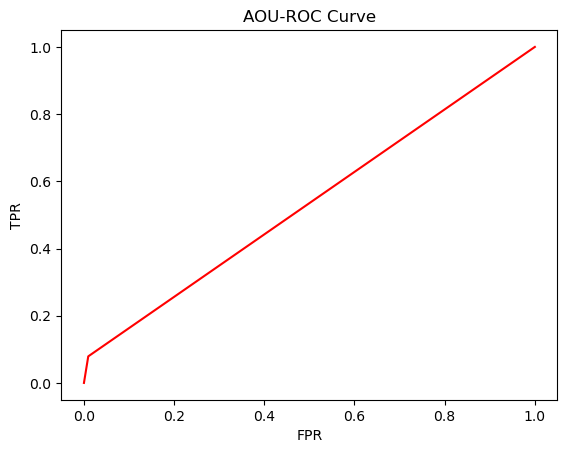

In [420]:
fig,ax=plt.subplots()
ax.plot(fpr5,tpr5,color="red")
plt.title("AOU-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show